### Implementation of accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> 

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a=-1
b=2
X=np.linspace(0,20)
X=X.reshape(50,1)
Y=a*X+b
len(Y)

50

#### Plot your data points. 

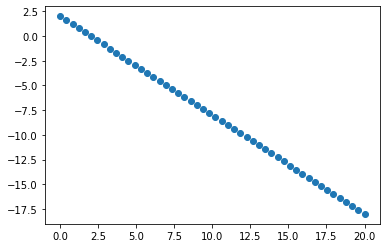

In [3]:
plt.scatter(X,Y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

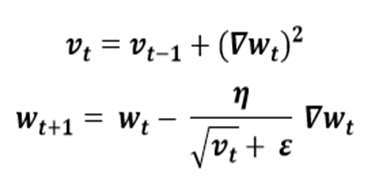

In [4]:
E=pow(10,-8)
alpha=.05
epochs=50000

In [5]:
def adagrad(X,Y,alpha,E,epochs):
    H=[]
    losses=[]
    iterations=[]
    th0=[]
    th1=[]
    vt1=0
    vt2=0
    count=0
    theta_0=0
    theta_1=0
    m=len(Y)
    i=0
    for i in range(epochs):
        
        hyp=theta_0+theta_1*X
        c=sum((hyp-Y)**2)
        cost=c/(2*len(X))
        losses.append(cost)
            
        grad_1=(1/m)*sum(theta_0+theta_1*X-Y)
        grad_2=(1/m)*sum((theta_0+theta_1*X-Y)*X)
        
        
        gradient=np.sum(np.power((grad_1-grad_2),2))
        th0.append(theta_0)
        th1.append(theta_1)
        
        vt1=vt1+(pow(grad_1,2))
        vt2=vt2+(pow(grad_2,2))
        
        vt1_s=math.sqrt(vt1)
        vt2_s=math.sqrt(vt2)
        
        theta_0=theta_0-((alpha/(vt1_s+E)))*grad_1
        theta_1=theta_1-((alpha/(vt2_s+E)))*grad_2
        

        iterations.append(count)
        count+=1
        H.append(hyp)
        
        if(i>=2):
            if(abs((losses[i-1]-losses[i])<0.0001)):
                break
    print("number of iterations is",count)             
            
    return th0,th1,losses,H,theta_0,theta_1,iterations
th0,th1,losses,H,theta_0,theta_1,iterations=adagrad(X,Y,alpha,E,epochs)
    
# print("MSE is = ",losses)
# print(theta_0)
# print(theta_1)


number of iterations is 2887


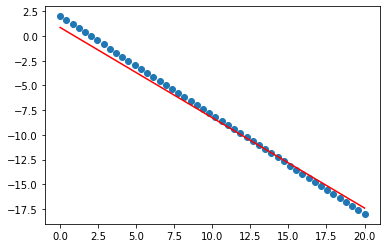

In [6]:
plt.plot(X,H[-1],color="r")
plt.scatter(X,Y)

Text(0, 0.5, 'Costs')

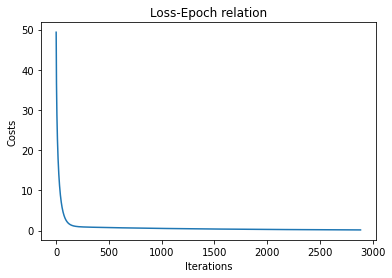

In [7]:
plt.plot(iterations,losses)
plt.title('Loss-Epoch relation')
plt.xlabel('Iterations')
plt.ylabel('Costs')

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'Costs')

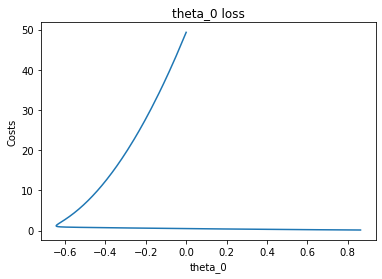

In [8]:
plt.plot(th0,losses)
plt.title('theta_0 loss')
plt.xlabel('theta_0')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

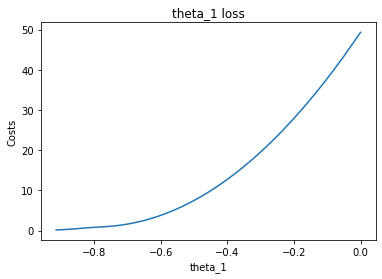

In [9]:
plt.plot(th1,losses)
plt.title('theta_1 loss')
plt.xlabel('theta_1')
plt.ylabel('Costs')

In [10]:
from sklearn.metrics import r2_score
r2_score(Y,H[-1])

0.9903793197210018

## RMSProp

In [11]:
E=pow(10,-8)
alpha=0.3
epochs=50000
def RMSPROP(X,Y,alpha,E,epochs):
    H=[]
    losses=[]
    iterations=[]
    th0=[]
    th1=[]
    vt1=0
    vt2=0
    count=0
    theta_0=0
    theta_1=0
    B=0.99
    m=len(Y)
    i=0
    for i in range(epochs):
        
        hyp=theta_0+theta_1*X
        c=sum(((hyp)-Y)**2)
        cost=(1/(2*len(X)))*c
        losses.append(cost)
            
        grad_1=(1/m)*sum(theta_0+theta_1*X-Y)
        grad_2=(1/m)*sum((theta_0+theta_1*X-Y)*X)
        gradient=np.sum(np.power((grad_1-grad_2),2))
        th0.append(theta_0)
        th1.append(theta_1)
        vt1=(B*vt1)+((1-B)*(pow(grad_1,2)))
        vt2=(B*vt2)+((1-B)*(pow(grad_2,2)))
        vt1_s=math.sqrt(vt1)
        vt2_s=math.sqrt(vt2)         
        theta_0=theta_0-((alpha/(vt1_s+E)))*grad_1
        theta_1=theta_1-((alpha/(vt2_s+E)))*grad_2
        iterations.append(count)
        count+=1
        H.append(hyp)
        
        if(i>=2):
            if(abs((losses[i-1]-losses[i])<0.00001)):
                break
    print("number of iterations is",count)             
            
    return th0,th1,losses,H,theta_0,theta_1,iterations
th0,th1,losses,H,theta_0,theta_1,iterations=RMSPROP(X,Y,alpha,E,epochs)
    
print("MSE is = ",losses)
print(theta_0)
print(theta_1)


number of iterations is 127
MSE is =  [array([49.34693878]), array([381.88775333]), array([30.47146078]), array([2.65568072]), array([0.98058106]), array([0.83573294]), array([0.785105]), array([0.74246135]), array([0.70228649]), array([0.66412856]), array([0.62787371]), array([0.59343452]), array([0.56072869]), array([0.52967732]), array([0.50020474]), array([0.47223833]), array([0.44570845]), array([0.42054832]), array([0.3966939]), array([0.37408382]), array([0.35265928]), array([0.33236393]), array([0.31314382]), array([0.29494727]), array([0.27772482]), array([0.26142914]), array([0.24601495]), array([0.23143891]), array([0.21765962]), array([0.20463746]), array([0.1923346]), array([0.18071487]), array([0.16974374]), array([0.15938824]), array([0.14961687]), array([0.1403996]), array([0.13170776]), array([0.12351403]), array([0.11579233]), array([0.10851783]), array([0.10166686]), array([0.09521687]), array([0.08914639]), array([0.08343498]), array([0.0780632]), array([0.07301254]

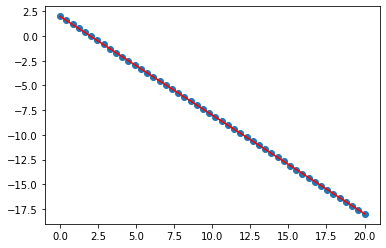

In [12]:
plt.plot(X,H[-1],color="r")
plt.scatter(X,Y)

Text(0, 0.5, 'Costs')

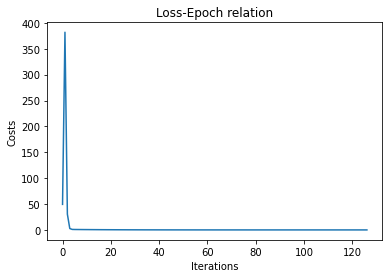

In [13]:
plt.plot(iterations,losses)
plt.title('Loss-Epoch relation')
plt.xlabel('Iterations')
plt.ylabel('Costs')

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'Costs')

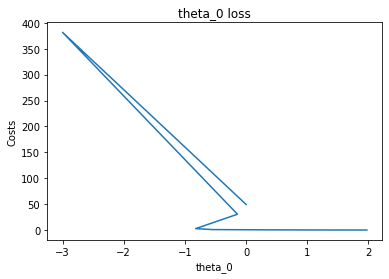

In [14]:
plt.plot(th0,losses)
plt.title('theta_0 loss')
plt.xlabel('theta_0')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

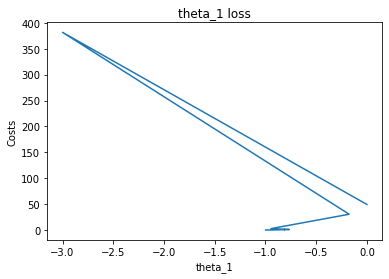

In [15]:
plt.plot(th1,losses)
plt.title('theta_1 loss')
plt.xlabel('theta_1')
plt.ylabel('Costs')

In [16]:
from sklearn.metrics import r2_score
r2_score(Y,H[-1])

0.9999949696846375

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

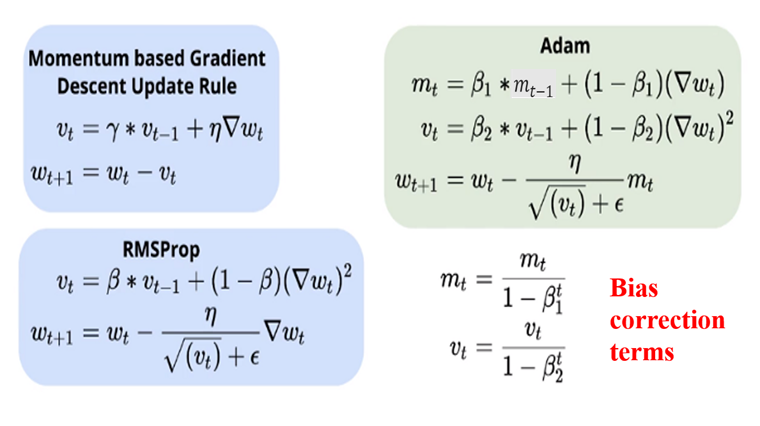

In [17]:
E=pow(10,-8)
alpha=0.001
epochs=50000
def adam(X,Y,alpha,E,epochs):
    H=[]
    losses=[]
    iterations=[]
    th0=[]
    th1=[]
    vt1=0
    vt2=0
    mt1=0
    mt2=0
    count=0
    theta_0=0
    theta_1=0
    B1=0.01
    B2=0.01
    m=len(Y)
    i=0
    for i in range(epochs):
        
        hyp=theta_0+theta_1*X
        c=sum(((hyp)-Y)**2)
        cost=(1/(2*len(X)))*c
        losses.append(cost)
        grad_1=(1/m)*sum(theta_0+theta_1*X-Y)
        grad_2=(1/m)*sum((theta_0+theta_1*X-Y)*X)
        
        gradient=np.sum(np.power((grad_1-grad_2),2))
        th0.append(theta_0)
        th1.append(theta_1)
        
        vt1=(B2*vt1)+((1-B2)*(pow(grad_1,2)))
        vt2=(B2*vt2)+((1-B2)*(pow(grad_2,2))) 
        
        mt1=(B1*mt1)+((1-B1)*grad_1)
        mt2=(B1*mt2)+((1-B1)*grad_2)
        mt1_mod=mt1/(1-pow(B1,i+1))
        mt2_mod=mt2/(1-pow(B1,i+1))
        
        vt1_mod=vt1/(1-pow(B2,i+1))
        vt2_mod=vt2/(1-pow(B2,i+1))
        
        vt1_s=math.sqrt(vt1_mod)
        vt2_s=math.sqrt(vt2_mod)

        

        theta_0=theta_0-((alpha/(vt1_s+E)))*mt1_mod
        theta_1=theta_1-((alpha/(vt2_s+E)))*mt2_mod
        iterations.append(count)
        count+=1
        H.append(hyp)
        
        if(i>=2):
            if(abs((losses[i-1]-losses[i])<0.00001 or gradient<0.001)):
                break
    print("number of iterations is",count)             
            
    return th0,th1,losses,H,theta_0,theta_1,iterations
th0,th1,losses,H,theta_0,theta_1,iterations=adam(X,Y,alpha,E,epochs)
    


print("MSE is = ",losses)
print(theta_0)
print(theta_1)


number of iterations is 3261
MSE is =  [array([49.34693878]), array([49.22432274]), array([49.10186241]), array([48.97955777]), array([48.85740882]), array([48.73541557]), array([48.61357801]), array([48.49189614]), array([48.37036997]), array([48.24899949]), array([48.1277847]), array([48.00672561]), array([47.88582222]), array([47.76507451]), array([47.6444825]), array([47.52404619]), array([47.40376557]), array([47.28364064]), array([47.16367141]), array([47.04385787]), array([46.92420002]), array([46.80469787]), array([46.68535141]), array([46.56616065]), array([46.44712557]), array([46.3282462]), array([46.20952252]), array([46.09095453]), array([45.97254223]), array([45.85428563]), array([45.73618472]), array([45.61823951]), array([45.50044999]), array([45.38281617]), array([45.26533803]), array([45.1480156]), array([45.03084885]), array([44.9138378]), array([44.79698245]), array([44.68028278]), array([44.56373882]), array([44.44735054]), array([44.33111796]), array([44.21504107]

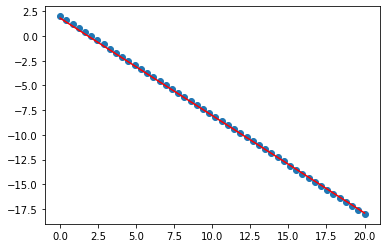

In [18]:
plt.plot(X,H[-1],color="r")
plt.scatter(X,Y)

Text(0, 0.5, 'Costs')

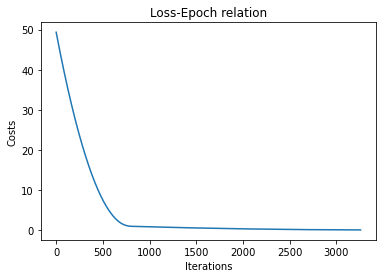

In [19]:
plt.plot(iterations,losses)
plt.title('Loss-Epoch relation')
plt.xlabel('Iterations')
plt.ylabel('Costs')

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'Costs')

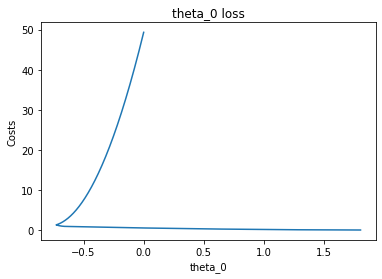

In [20]:
plt.plot(th0,losses)
plt.title('theta_0 loss')
plt.xlabel('theta_0')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

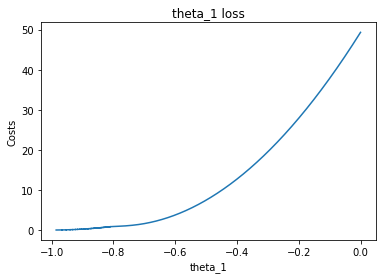

In [21]:
plt.plot(th1,losses)
plt.title('theta_1 loss') 
plt.xlabel('theta_1')
plt.ylabel('Costs')

In [22]:
from sklearn.metrics import r2_score
r2_score(Y,H[-1])

0.9997147538190428